In [1]:
# from __future__ import print_function
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')
import string

import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious        as CV
from PostProcessingScripts import * 
from ClassFormationChannels_5mainchannels import * 


import pandas as pd


from astropy import units as u
from astropy import constants as const


In [2]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [3]:
print(MSSFRnameslist)




MSSFRnameslistWantedOrder = []
MSSFRnameslistWantedOrder.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate([0,1,2]):
    ind_x = ind_GSMF + 1
    for ind_MZ, MZ in enumerate([0,1,2]):
        ind_y = ind_MZ +1
        for ind_SFR, SFR in enumerate([0,1,2]):
            ind_z = ind_SFR+1
            
            
            
            
        

            MSSFRnameslistWantedOrder.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
            
print(MSSFRnameslistWantedOrder)


indexlist = np.asarray(range(28))
print(indexlist)
indexOrderedToOldMSSFR = []
for mssfr in MSSFRnameslistWantedOrder:
    mask = (np.asarray(MSSFRnameslist)==mssfr)
    ind_map = indexlist[mask]
    indexOrderedToOldMSSFR.append(int(ind_map[...].squeeze()))
    
    
print(indexOrderedToOldMSSFR)



dictOldmssfrINDtoNEWmssfrIND = {MSSFRnameslist[i]: indexOrderedToOldMSSFR[i] for i in range(len(MSSFRnameslist))}

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
['000', '111', '112', '113', '121', '122', '123', '131', '132', '133', '211', '212', '213', '221', '222', '223', '231', '232', '233', '311', '312', '313', '321', '322', '323', '331', '332', '333']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[0, 1, 4, 7, 10, 13, 16, 19, 22, 25, 2, 5, 8, 11, 14, 17, 20, 23, 26, 3, 6, 9, 12, 15, 18, 21, 24, 27]


In [4]:
def tfZ(Z):
    Zsolar=0.0142
    logZ = np.log10(Z) # /Zsolar
    return logZ
import seaborn as sns

In [5]:
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}


physicalNamesBPSmodels = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}=2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}=3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}=100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}=30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}=0\,\rm{km}\,\rm{s}^{-1}$' ]



alphabetPhysicalNameDict =  {BPSnameslist[i]: physicalNamesBPSmodels[i] for i in range(len(BPSnameslist))}



physicalNamesBPSmodelsWithEnter = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable}' + '\n'+ r'\textbf{case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}$' +'\n' + r'$0\,\rm{km}\,\rm{s}^{-1}$' ]

alphabetPhysicalNameDictWithEnter =  {BPSnameslist[i]: physicalNamesBPSmodelsWithEnter[i] for i in range(len(BPSnameslist))}


print(alphabetPhysicalNameDict['E'])

\textbf{unstable case BB}


In [212]:
def plotPDF(DCOtype='BHNS', BPSnameslist=['A'], xvarname=0, bins=20, axe=None,  ylim=None, xlabel='xlabel', ylabel='ylabel', whichWeight='det'):
    """  
    options:
    
    
    xvarind, index of the variable in the list ['Mass1', 'Mass2', 'tc',\
                   'log10(tc)', 'TotMass', 'ChirpMass', 'q', Z, log(Z/Zsun)]
    
    """
    
    nModels = 15
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    Zsolar=0.0142

    # naming is slightly different for some files
    if DCOtype=='BHNS':
        DCOname='BHNS'
    elif DCOtype=='BHBH':
        DCOname='BBH'
    elif DCOtype=='NSNS':
        DCOname='BNS'
    


    maxhPDF = 0.0
    minhPDF = 100

#     alphabet = list(string.ascii_uppercase)
    BPSnameslistD = alphabet[:12]

#     BPSdir = ['fiducial/', 'fiducial/', 'alpha0_5/', 'alpha2_0/', 'unstableCaseBB/', 'rapid/', 'zeroBHkick/', 'massTransferEfficiencyFixed_0_25/', 'massTransferEfficiencyFixed_0_5/', 'massTransferEfficiencyFixed_0_75/', 'ccSNkick_100km_s/', 'ccSNkick_30km_s/']

#     dictBPSnameToDir   = dict(zip(BPSnameslistD, BPSdir))    
#     dictBPSnameToColor = dict(zip(BPSnameslistD, BPScolors))

    path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]
    modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
                   'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

    alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}    

    
    xright=-0.3
    for ind_m, BPSmodelName in enumerate(BPSnameslist):


        #####

        path_ = path_dir
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOname +'_' + BPSmodelName + '.h5'




        # read in data 
        fdata = h5.File(path)        

        
        
        
        
        


        fdata = h5.File(path)

        # obtain BH and NS masses
        if xvarname in ['Mass1', 'Mass2', 'TotMass', 'ChirpMass', 'q']:
            M1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
            M2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
            MBH, MNS = obtainM1BHandM2BHassymetric(M1, M2)
            del M1
            del M2  

            if xvarname=='Mass1':
                xvar = MBH
            elif xvarname=='Mass2':
                xvar = MNS
            elif xvarname=='TotMass':
                xvar = MBH + MNS
            elif xvarname=='ChirpMass':
                xvar = chirpmass(MBH,MNS)
            elif xvarname=='q':
                xvar = MBH/MNS

        elif xvarname in ['tc','log10(tc)']:
            xvar = fdata['doubleCompactObjects']['tc'][...].squeeze() /1000.  # in Gyr
            if xvarname=='log10(tc)':
                xvar = np.log10(xvar)

        elif xvarname in ['metallicitySystems', 'log10metallicitySystems']:
            xvar = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            if xvarname=='log10metallicitySystems':
                xvar = np.log10(xvar)

        else: 
            print('error in xvarname')




   

        print('now at model ', BPSmodelName)



#         ind_max = len(MSSFRnameslist) + xvarind*len(MSSFRnameslist)
#         ind_min = xvarind*len(MSSFRnameslist)

        dx = 0.4 #3
        dxrange = np.linspace(-dx, +dx, len(MSSFRnameslist)+1) + ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)


        # which weights do we want?
        if whichWeight =='det':
            fparam_name ='weights_detected'
        elif whichWeight=='z0':
            fparam_name = 'weights_intrinsic'



        for ind_mssfr, mssfr in enumerate(MSSFRnameslist):
            weightheader = 'w_' + mssfr
            weights = fdata[fparam_name][weightheader][...].squeeze()


#                 print('now at mssfr ', ind_mssfr+1, 'out of ', len(MSSFRnameslist))        




            hist, bin_edges = np.histogram(a=xvar, bins=bins, density=True, weights=weights)
            hist = hist * (bins[-1]-bins[0])/(len(bins)-1) # normalize s.t. np.sum(hist)=1

#                 print(np.sum(hist), '=1? should be!!!!')
#             if ind_mssfr==0:
#                 print(hist)


            xx = dxrange[ind_mssfr]
            xxx = [dxrange[ind_mssfr]-dxlen, dxrange[ind_mssfr]+dxlen]
            cm       = plt.get_cmap('viridis')
            


            # iterate over histogram bins (from low to high)
            for ind_bin, binedge in enumerate(bin_edges[1:]):
                # get alpha mapping from function

                ALPHA = histvalueToAlphaLog(hist[ind_bin])
                maxhPDF = max([hist[ind_bin], maxhPDF])
                minhPDF = min([hist[ind_bin], minhPDF])
                
                
                yyy1 = bin_edges[ind_bin]
#                 if (ind_mssfr==0) & (ind_m==0):
#                     print(hist[ind_bin],   ALPHA , 'for mbh=', yyy1)
#                 axe.fill_between(xxx, y1=[yyy1, yyy1], y2=[binedge,binedge], alpha=1, color='white', \
#                                  zorder=100,  edgecolor='k', lw=20)
                axe.fill_between(xxx, y1=[yyy1, yyy1], y2=[binedge,binedge], color=cm(ALPHA), \
                                 zorder=200, edgecolor='k', lw=0.5)


    if DCOtype in ['BHBH', 'NSNS']:
        print("now doing GWTC-1 catalog observations")
    
        # obtain GWTC-1 distribution "ish"
        if xvarname in ['Mass1', 'Mass2', 'TotMass', 'ChirpMass', 'q']:
            
            M1_GWTC1, M2_GWTC1, w_GWTC1 = obtainGWTC1_MassAndWeight(DCOtype) 


            MBH, MNS = obtainM1BHandM2BHassymetric(M1_GWTC1, M2_GWTC1)


            if xvarname=='Mass1':
                xvar = MBH
            elif xvarname=='Mass2':
                xvar = MNS
            elif xvarname=='TotMass':
                xvar = MBH + MNS
            elif xvarname=='ChirpMass':
                xvar = chirpmass(MBH,MNS)
            elif xvarname=='q':
                xvar = MBH/MNS    



            hist, bin_edges = np.histogram(a=xvar, bins=bins, density=True, weights=w_GWTC1)
            hist = hist * (bins[-1]-bins[0])/(len(bins)-1) # normalize s.t. np.sum(hist)=1

            dx = 0.1

            xx = dxrange[ind_mssfr]
            xxx = [ind_m +1 - dx, ind_m +1 +dx]
            cm       = plt.get_cmap('viridis')

            # iterate over histogram bins (from low to high)
            for ind_bin, binedge in enumerate(bin_edges[1:]):
                # get alpha mapping from function
                ALPHA = histvalueToAlphaLog(hist[ind_bin])


                yyy1 = bin_edges[ind_bin]

                axe.fill_between(xxx, y1=[yyy1, yyy1], y2=[binedge,binedge], color=cm(ALPHA), \
                                 zorder=200, edgecolor='k', lw=0.5)



    
    axe.set_xlim(-0.5, len(BPSnameslist)+xright)

    axe.set_ylim(ylim[0], ylim[1])
    
    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=20)
    
    
#     axe.text(0.99, 0.8, DCOtype, rotation = 0, fontsize = fs+4, color = 'k', ha = 'right',transform=axe.transAxes)#, weight = 'bold')    
#     axe.set_xticks(range(len(BPSnameslist)))
#     axe.set_xticklabels(BPSnameslist)
    
    
    if xvarname=='log10metallicitySystems':
        physicalnames = []
        for ind_m, bps_model in enumerate(BPSnameslist):
            physicalnames.append(r'\textbf{%s}'%(bps_model) )
        axe.set_xticks(range(len(BPSnameslist)))
        axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,
    
#     if xvarind==0:

    ##### SECOND AXIS ######
    physicalnames=[]
    for ind_m, bps_model in enumerate(BPSnameslist):
        physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
    ax2y = axe.twiny()
    ax2y.set_xlim(-0.5, len(BPSnameslist)+xright)

    
    print('fontsize', fs)
    if xvarname=='Mass1':
        ax2y.set_xticks(range(len(BPSnameslist)))
        ax2y.set_xticklabels(physicalnames, fontsize=fs-8, rotation=30) 
    else:
        ax2y.set_xticks([])
        ax2y.set_xticklabels([]) 
    
#     if xvarname=='Mass1':
#         ax2 = axe.twiny()
#         ax2.set_xticks(range(len(MSSFRnameslist)+1))
#         MSSFRlabels = np.concatenate((np.asarray([r'$ \rm{xyz}: $ ']), MSSFRnameslist))
#         ax2.set_xticklabels(MSSFRlabels, rotation=0, fontsize=15)    

#         ax2.set_xlim(np.min(range(len(MSSFRnameslist)+1)), np.max(range(len(MSSFRnameslist)+2)))
#         ax2.tick_params(top=False)
    print('max PDF height = ', maxhPDF)  
    print('min PDF height = ', minhPDF)  
    return 
            
            

            
    
    
    
    

In [213]:
# def histvalueToAlphaLog(h):
    
#     minAlpha, maxAlpha = 0.4,1
#     minh, maxh = 0.01, .2
    
# #     print(h)
#     if h==0:
#         val = 0
#         return val
        
        
# #     h = np.log10(h)
    
#     if  h<= 0.0001:
        
#         val = 0.1
#         return val
#     elif  h<= 0.001:
        
#         val = 0.2
#         return val
#     elif  h<= 0.01:
        
#         val = 0.3
#         return val
    
#     elif h>=maxh:
#         val=0.999
#         return val
    
#     else:
#         dh = (maxh - minh)  
#         dAlpha = (maxAlpha - minAlpha)  
#         val = (((h - minh) * dAlpha) / dh) + minAlpha    

    
        
    
    
# #     alphaspace = np.linspace(minAlpha, maxAlpha, nrAlphas)
    
# #     if h >=maxh:
# #         alpha = maxAlpha
# #     elif h==0:
# #         alpha=0
# #     elif h<=minh:
# #         alpha=0
        
# #     else:

# #         dh = np.log10(maxh) - np.log10(minh)
# #         dalpha  = maxAlpha - minAlpha
  




# #         hh = np.log10(h)
# #         hh = hh * (dalpha/dh) + (maxAlpha - (np.log10(maxh)* (dalpha/dh)))




# #         for ind, alphas in enumerate(alphaspace):
# #             if hh>= alphas:
# #                 alpha = alphas
    
    
    
    
#         return val
    
    
    
    
    
    
    

In [230]:
def histvalueToAlphaLog(h):
    
    minAlpha, maxAlpha = 0,1
    minh, maxh = 0.0, MAX_h
    

    dh = (maxh - minh)  # 0.4 
    dAlpha = (maxAlpha - minAlpha)  #1
    val = (((h - minh) * dAlpha) / dh) + minAlpha    

    
        
    
    
    return val
    
    
    
    
    
    
    

In [231]:
print(histvalueToAlphaLog(0.2))

0.666666666667


('now at model ', 'A')
('now at model ', 'B')
('now at model ', 'C')
('now at model ', 'D')
('now at model ', 'E')
('now at model ', 'F')
('now at model ', 'G')
('now at model ', 'H')
('now at model ', 'I')
('now at model ', 'J')
('now at model ', 'K')
('now at model ', 'L')
('now at model ', 'M')
('now at model ', 'N')
('now at model ', 'O')
('fontsize', 24)
('max PDF height = ', 0.5026819650191828)
('min PDF height = ', 0.0)
('now at model ', 'A')
('now at model ', 'B')
('now at model ', 'C')
('now at model ', 'D')
('now at model ', 'E')
('now at model ', 'F')
('now at model ', 'G')
('now at model ', 'H')
('now at model ', 'I')
('now at model ', 'J')
('now at model ', 'K')
('now at model ', 'L')
('now at model ', 'M')
('now at model ', 'N')
('now at model ', 'O')
('fontsize', 24)
('max PDF height = ', 0.3616177152260056)
('min PDF height = ', 0.0)
('now at model ', 'A')
('now at model ', 'B')
('now at model ', 'C')
('now at model ', 'D')
('now at model ', 'E')
('now at model ', 'F')


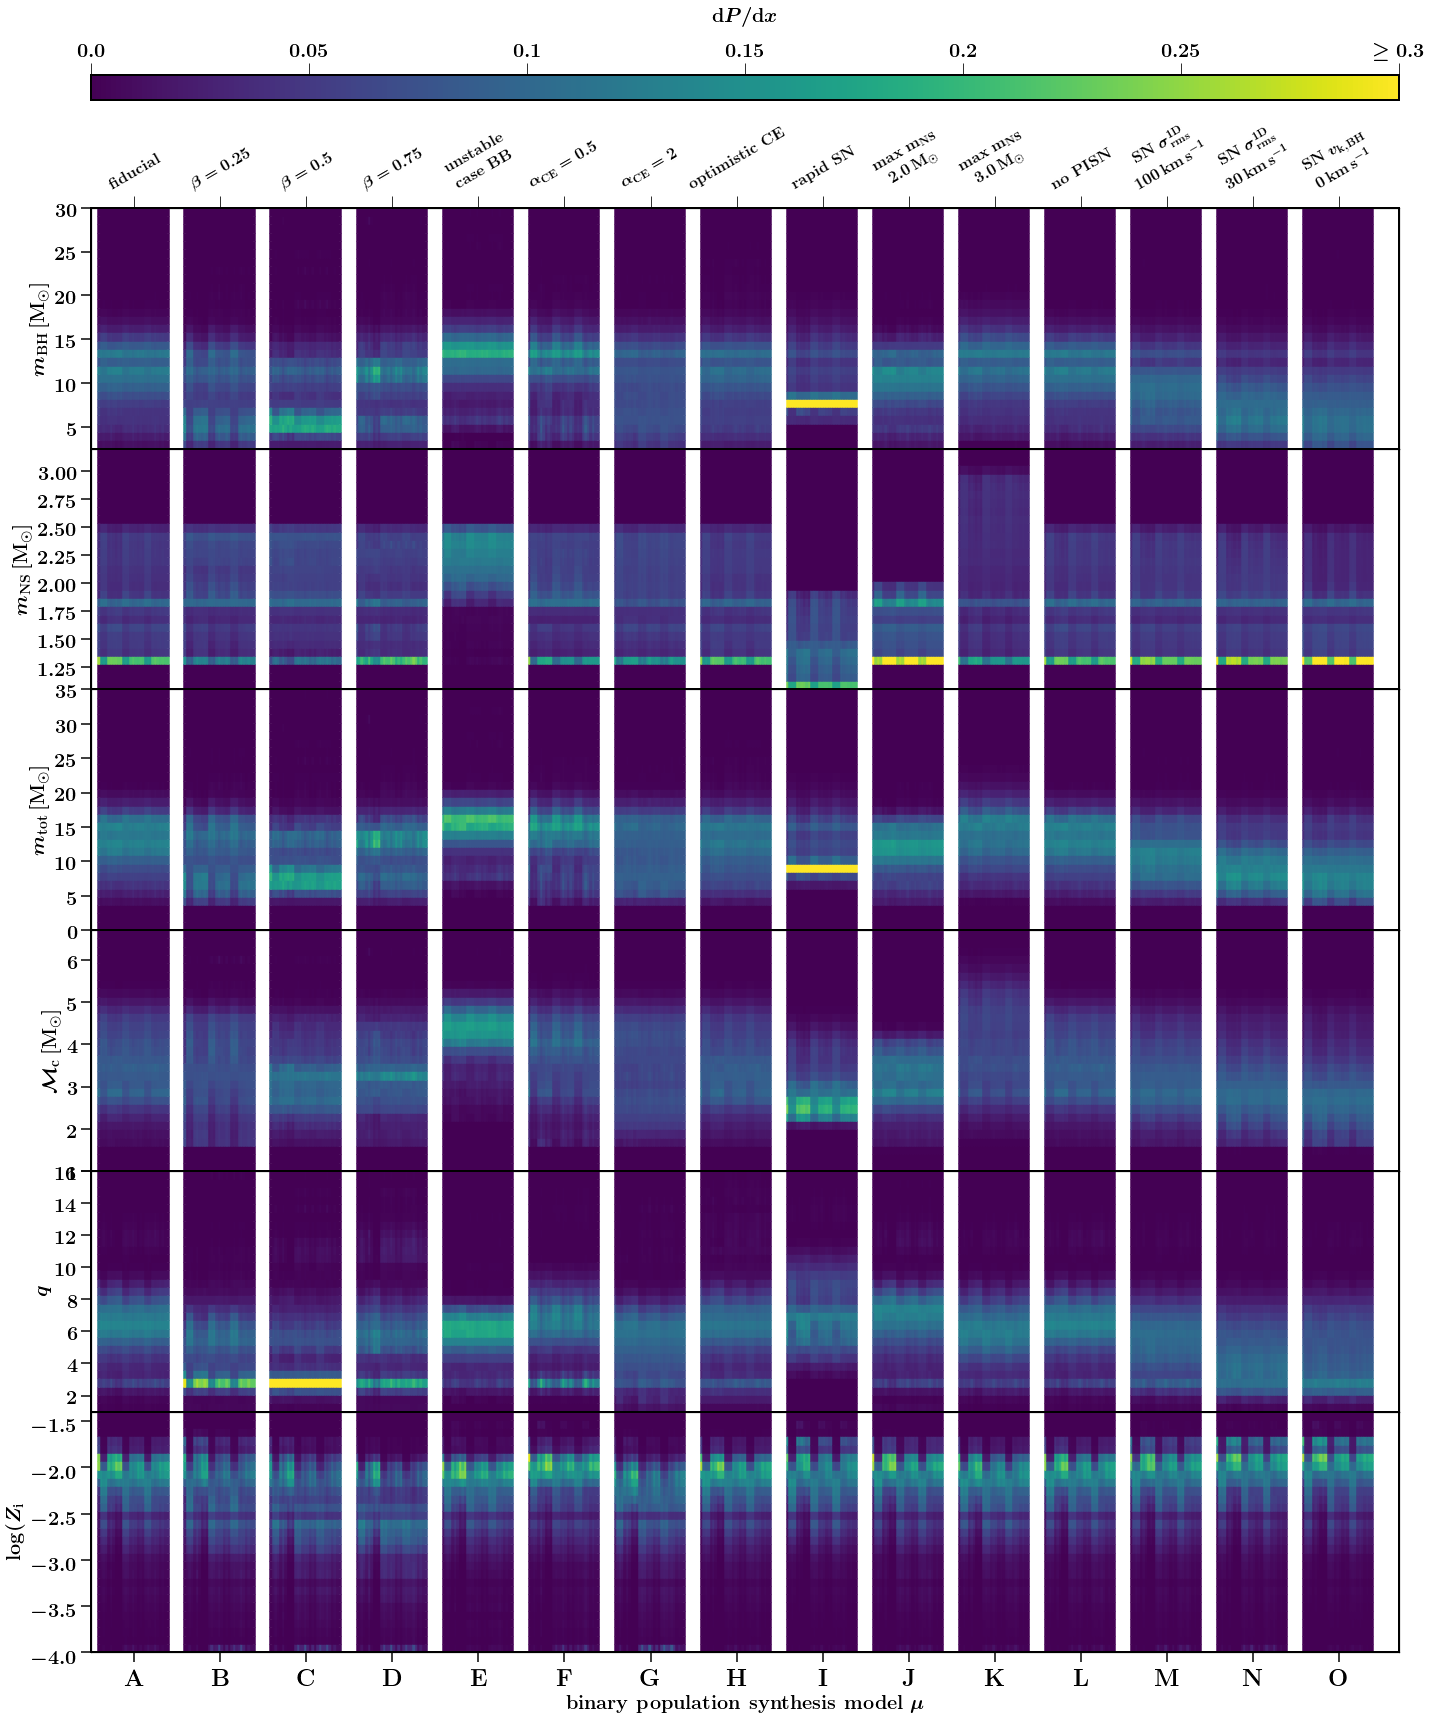

In [232]:
NumberBPSmodels=15
alphabet = list(string.ascii_uppercase)
BPSnameslist = alphabet[:NumberBPSmodels]
# BPSnameslist=['A']


MAX_h = 0.3

DCOtype='BHNS'
ncols, nrows= 1,7
nModels=15
xright=-0.3
# f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,20), 
#               gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


ncols, nrows= 1,9
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,24), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.concatenate(([0.2,0.1,0.45], np.ones(nrows-3)))})


xlabel = r'\textbf{binary population synthesis model} $\mu$'

# BPSnameslist = ['A', 'B']
NBins = 30
# BH MASS 
ylabel = r'$m_{\rm{BH}}   \, [\rm{M}_{\odot}]$'
ylim=[2.5,30]
bins = np.linspace(ylim[0],ylim[1],NBins)
xvarname='Mass1'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[3],  ylim=ylim, \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    
    
# NS MASS     
ylim=[1.05,3.2]
ylabel = r'$m_{\rm{NS}}   \, [\rm{M}_{\odot}]$'
bins = np.linspace(ylim[0],ylim[1],NBins)
xvarname='Mass2'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[4],  ylim=ylim, \
 xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    
# # NS MASS     
ylabel = r'$m_{\rm{tot}}   \, [\rm{M}_{\odot}]$'
ylim=[0,35]
bins = np.linspace(ylim[0],ylim[1],NBins)
# bins = np.linspace(1,40,25)
xvarname='TotMass'
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[5],  ylim=ylim, \
xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    

    
    
print('halfway')
ylabel = r'$\mathcal{M}_{\rm{c}}  \, [\rm{M}_{\odot}]$'
xvarname='ChirpMass'
ylim=[1.01,6.7]
bins = np.linspace(ylim[0],ylim[1],NBins)
# bins = np.linspace(1,9,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[6],  ylim=ylim, \
xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    






xvarname='q'
ylabel = r'$q$'
ylim=[1,16]
bins = np.linspace(ylim[0],ylim[1],NBins)
## bins = np.linspace(1,21,25)
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[7],  ylim=ylim, \
xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    

xvarname='log10metallicitySystems'
ylabel = r'$\log(Z _{\rm{i}})$'
ylim=[-4,np.log10(0.04)]
bins = np.linspace(ylim[0],ylim[1],NBins)
## bins = np.linspace(np.log10(0.0001),np.log10(0.3))
plotPDF(DCOtype=DCOtype, BPSnameslist=BPSnameslist, xvarname=xvarname, bins=bins, axe=axe[8],  ylim=ylim, \
xlabel=xlabel, ylabel=ylabel, whichWeight='det')
    

print(MAX_h)

xx = np.linspace(0,MAX_h, 100)
nonvalues = xx-100

axe[0].axis('off')
axe[2].axis('off')

cm = plt.cm.get_cmap('viridis')
xy = range(20)
z = xy
sc = axe[3].scatter(nonvalues, nonvalues, c=xx, vmin=0, vmax=MAX_h, s=35, cmap=cm)
axe[3].set_xlim(-0.5, nModels+xright)


cbar = f.colorbar(sc, cax=axe[1], orientation='horizontal')#orientation="horizontal", pad=0.2) , format="%.3f"
cbar.ax.tick_params(labelsize=20, labeltop=True, labelbottom=False, bottom=False, top=True)
# cbar.set_label( label=r'${\rm{d}}P / {\rm{d}}x$', size=fs-4,position=(0.5,-1))
axe[0].set_title(label=r'${\rm{d}}P / {\rm{d}}x$', size=20)

ticksz = [0.0,0.05,0.10, 0.15, 0.2, 0.25, 0.30]
cbar.ax.set_xticks(ticksz)
labelsz = []
for tick in ticksz:
    if tick ==0.30:
        labelsz.append(r'$\geq %s$'%tick)
    else:
        labelsz.append(r'$%s$'%tick)

cbar.ax.set_xticklabels(labelsz,  fontsize=20) #rotation=55,
# cbar.ax.tick_params(labelsize=fs)

# plt.show()

    
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)    
    
print('lemme just save this image')
f.savefig('./PDFheatmapFig16Figures/PDF_BPSandMSSFRvariations_Summary_' +DCOtype + '_Z_viridis2.png', dpi=600 ) #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
f.savefig('./PDFheatmapFig16Figures/PDF_BPSandMSSFRvariations_Summary_' +DCOtype +'_Z_viridis2.pdf') #, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
plt.show()

plt.close()

## COLORBAR: 

0.3
0.3
['$0.0$', '$0.05$', '$0.1$', '$0.15$', '$0.2$', '$0.25$', '$\\geq 0.3$']


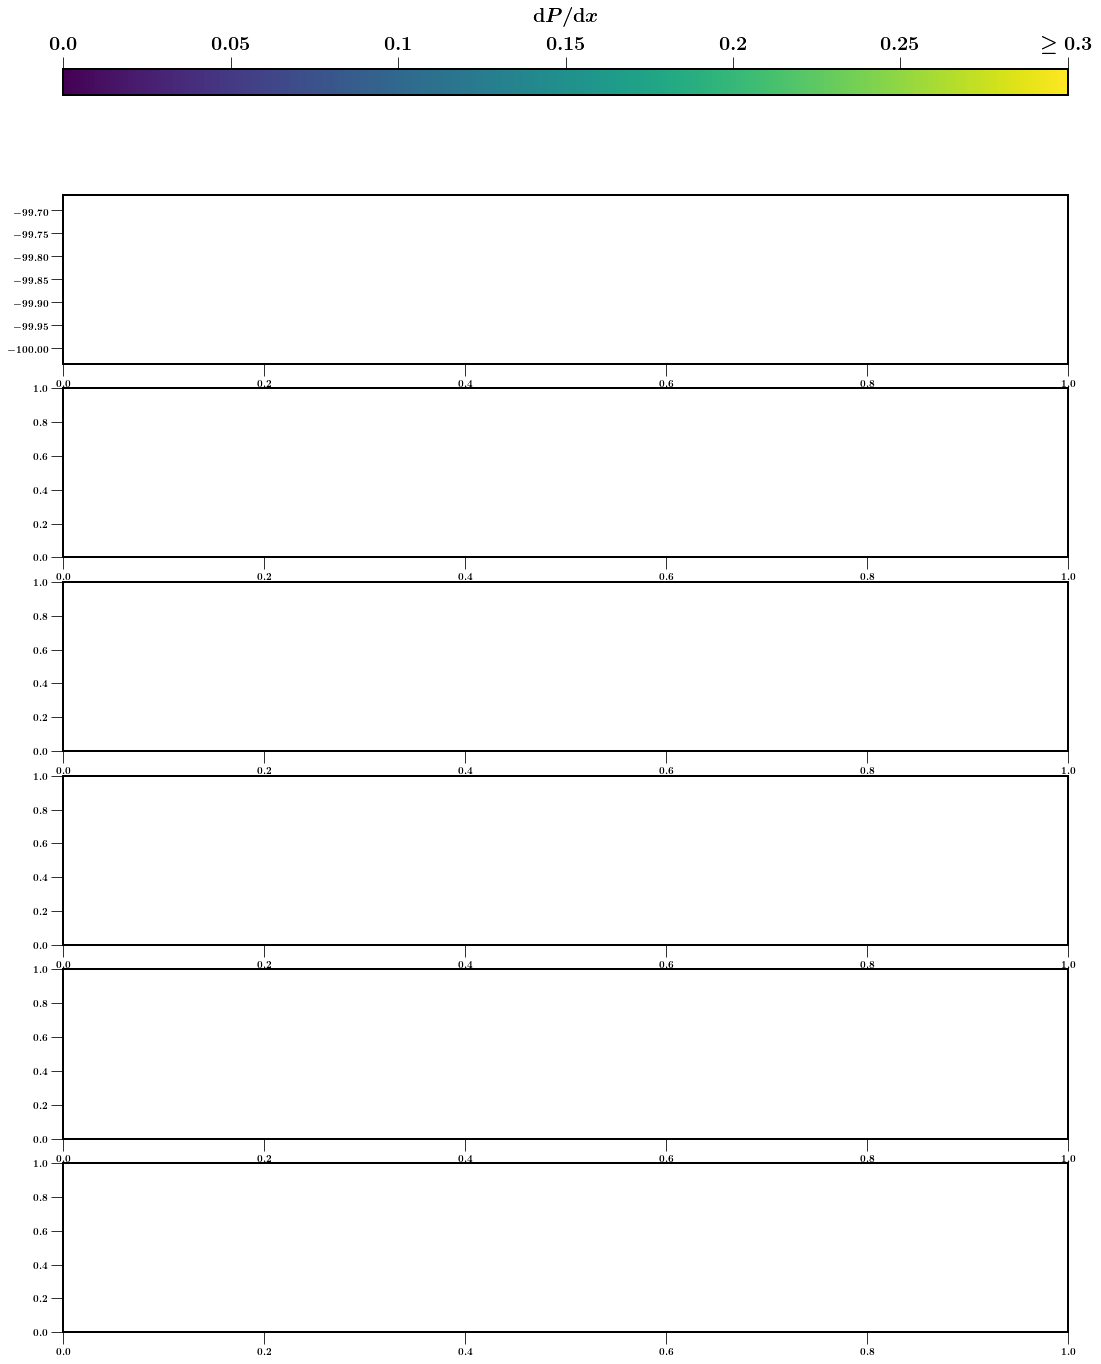

In [229]:


ncols, nrows= 1,9
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(18,24), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.concatenate(([0.1,0.15,0.3], np.ones(nrows-3)))})



print(MAX_h)
print(MAX_h)
xx = np.linspace(0,MAX_h, 100)
nonvalues = xx-100

axe[0].axis('off')
axe[2].axis('off')

cm = plt.cm.get_cmap('viridis')
xy = range(20)
z = xy
sc = axe[3].scatter(nonvalues, nonvalues, c=xx, vmin=0, vmax=MAX_h, s=35, cmap=cm)
axe[3].set_xlim(0,1)

cbar = f.colorbar(sc, cax=axe[1], orientation='horizontal' , format="%.2f")#orientation="horizontal", pad=0.2)
cbar.ax.tick_params(labelsize=20, labeltop=True, labelbottom=False, bottom=False, top=True)


ticksz = [0.0,0.05,0.10, 0.15, 0.2, 0.25, 0.30]
cbar.ax.set_xticks(ticksz)
labelsz = []
for tick in ticksz:
    if tick ==0.30:
        labelsz.append(r'$\geq %s$'%tick)
    else:
        labelsz.append(r'$%s$'%tick)

cbar.ax.set_xticklabels(labelsz,  fontsize=20) #rotation=55,



axe[0].set_title(label=r'${\rm{d}}P / {\rm{d}}x$', size=20)




plt.show()

In [ ]:
ValueError: keyword weight is not recognized; valid keywords are [u'size', u'width', u'color', u'tickdir', u'pad', u'labelsize', u'labelcolor', u'zorder', u'gridOn', u'tick1On', u'tick2On', u'label1On', u'label2On', u'length', u'direction', u'left', u'bottom', u'right', u'top', u'labelleft', u'labelbottom', u'labelright', u'labeltop', u'labelrotation', u'grid_agg_filter', u'grid_alpha', u'grid_animated', u'grid_antialiased', u'grid_clip_box', u'grid_clip_on', u'grid_clip_path', u'grid_color', u'grid_contains', u'grid_dash_capstyle', u'grid_dash_joinstyle', u'grid_dashes', u'grid_drawstyle', u'grid_figure', u'grid_fillstyle', u'grid_gid', u'grid_label', u'grid_linestyle', u'grid_linewidth', u'grid_marker', u'grid_markeredgecolor', u'grid_markeredgewidth', u'grid_markerfacecolor', u'grid_markerfacecoloralt', u'grid_markersize', u'grid_markevery', u'grid_path_effects', u'grid_picker', u'grid_pickradius', u'grid_rasterized', u'grid_sketch_params', u'grid_snap', u'grid_solid_capstyle',

In [ ]:
 u'grid_solid_joinstyle', u'grid_transform', u'grid_url', u'grid_visible', u'grid_xdata', u'grid_ydata', u'grid_zorder', u'grid_c', u'grid_mfc', u'grid_ms', u'grid_mew', u'grid_aa', u'grid_mfcalt', u'grid_mec', u'grid_lw', u'grid_ls']